In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

In [1]:
# Задание 1
# Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, 
# главное - функция с нужными свойствами):
# a) бесконечное количество локальных экстремумов
# b) 2 локальных экстремума
# с) 3 локальных экстремума
# d*) область определения функции - 1 точка

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 15
         Function evaluations: 30


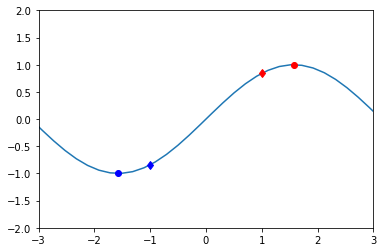

In [13]:
# a 
def f(x): 
    return np.sin(x) #х - любое действительное число
#b
def f(x):
    return np.sin(x) # область определения Х [-1;1] 
def f_(x): 
    return -f(x) 
x0 = -1
xmin0 = fmin(f,x0)

x1 = 1
xmax1 = fmin(f_,x1)

x = np.linspace(-10,10,100) 
y = f(x) 
pylab.plot(x,y)

pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
pylab.plot(x1, f(x1), 'rd', xmax1, f(xmin1), 'ro')
pylab.axis([-3,3,-2,2]) 
pylab.show()



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 10
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22


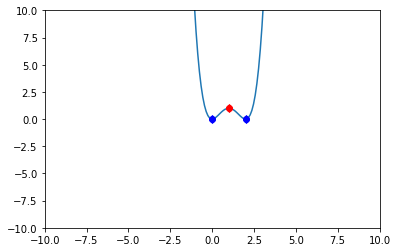

In [56]:
#c
def f(z):
    return z**2*(z-2)**2
def f_(z): 
    return -f(z) 

z0 = 0
zmin0 = fmin(f,z0)

z1 = 1
zmax1 = fmin(f_,z1)

z2 = 2
zmin2 = fmin(f,z2)

x = np.linspace(-5,5,100) 
y = f(x) 
pylab.plot(x,y)

pylab.plot(z0, f(z0), 'bd', zmin0, f(zmin0), 'bo')
pylab.plot(z1, f(z1), 'rd', zmax1, f(zmax1), 'ro')
pylab.plot(z2, f(z2), 'bd', zmin2, f(zmin2), 'bo')
pylab.axis([-10,10,-10,10]) 
pylab.show()



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6


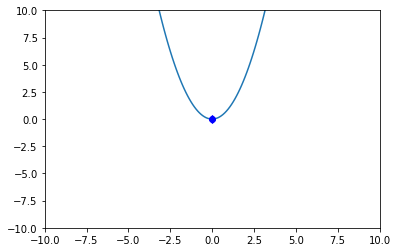

In [57]:
#d
def f(y):
    return y**2
def f_(y): 
    return -f(y) 

y0 = 0
ymin0 = fmin(f,y0)

x = np.linspace(-5,5,100) 
y = f(x) 
pylab.plot(x,y)

pylab.plot(y0, f(y0), 'bd', ymin0, f(ymin0), 'bo')
pylab.axis([-10,10,-10,10]) 
pylab.show()

In [2]:
# Задание 2
# Посчитайте 1-ую и 2-ую производные функции (на бумажке):
# f(x) = sin^2(2x+1)

In [73]:
# Задание 3:
# Посчитайте частные производные функции в точкe (на бумажке или в LaTeX и на numpy):
# f(x,y)=2x^2y^3 + 1/x + y^2x + 7 в точке (1,2)
from sympy import symbols, diff
x, y = symbols('x y', real=True)
f = 2*x**2*y**3 + 1/x + y**2*x + 7
z_x = diff(f,x)
print(z_x)
z_y = diff(f,y)
print(z_y)
print(z_x," = ", float(z_x.subs({x:1, y:2})))
print(z_y," = ", float(z_y.subs({x:1, y:2})))

4*x*y**3 + y**2 - 1/x**2
6*x**2*y**2 + 2*x*y
4*x*y**3 + y**2 - 1/x**2  =  35.0
6*x**2*y**2 + 2*x*y  =  28.0


In [ ]:
# Задание 4:
# Градиентный спуск своими руками

In [92]:
def f(x):
    return (x[0]**2) + (x[1]**2)
x = np.array([100, 200])
lr = 0.1
for i in range(100):
    eps = np.sqrt(np.finfo(float).eps) # Calculate gradient
    grad = approx_fprime(x, f, [eps, eps] ) # Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    
    # Update x with gradient
    x = x - lr*grad # Your code here (смотри слайд презентации про градиентный спуск)
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

# Проверка с помощью встроенной функции numpy:
res = minimize(f, x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
